In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:.4f}'.format




from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE


/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [2]:
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [3]:
printmd("**bold and blue**", color="blue")


<span style='color:blue'>**bold and blue**</span>

In [4]:
print('dkjvkjfs')
printmd('dkjvkjfs')

dkjvkjfs


<span style='color:None'>dkjvkjfs</span>

In [5]:
df=pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


##### customerID: Customer ID
##### gender: Whether the customer is a male or a female
##### SeniorCitizen :Whether the customer is a senior citizen or not (1, 0)
##### Partner :Whether the customer has a partner or not (Yes, No)
##### Dependents Whether the customer has dependents or not (Yes, No)
##### tenure: Number of months the customer has stayed with the company
##### PhoneService :Whether the customer has a phone service or not (Yes, No)
##### MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
##### InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
##### OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
##### OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
##### DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
##### TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
##### StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
##### StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
##### Contract:  The contract term of the customer (Month-to-month, One year, Two year)
##### PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
##### PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
##### MonthlyCharges: The amount charged to the customer monthly
##### TotalCharges :The total amount charged to the customer
##### Churn: Whether the customer churned or not (Yes or No)

In [7]:
from IPython.display import display, HTML, display_html
display(df.head())
display(df.sample(5))
display(df.shape)
display(df.dtypes)
display(df.nunique())
display(df.describe())
display(df.describe(include = 'O'))
display(df.isna().sum())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4562,5322-TEUJK,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.6000,8100.25,No
5122,4353-HYOJD,Female,0,Yes,Yes,27,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.8500,1336.15,No
826,3643-AHCFP,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.6000,644.35,Yes
971,5002-GCQFH,Male,0,Yes,No,49,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.8500,4733.1,No
2969,1163-VIPRI,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.3000,7337.55,No


(7043, 21)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1310-QRITU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

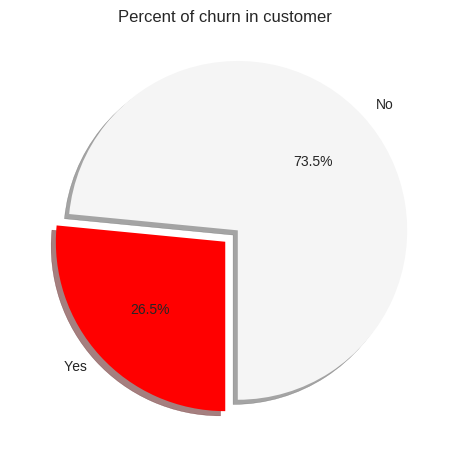

In [8]:
# Data to plot
labels =df['Churn'].value_counts().index
sizes = df['Churn'].value_counts()

plt.pie(sizes, explode=(0.1,0), labels=labels, colors=["whitesmoke","red"], autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [9]:
df['gender'] = df['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)                 #
df['Partner'] = df['Partner'].map( {'No': 0, 'Yes': 1} ).astype(int)                    #
df['Dependents'] = df['Dependents'].map( {'No': 0, 'Yes': 1} ).astype(int)              #
df['PhoneService'] = df['PhoneService'].map( {'No': 0, 'Yes': 1} ).astype(int)          #
df['OnlineSecurity'] = df['OnlineSecurity'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)  #
df['Churn'] = df['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)                        #
df['OnlineBackup'] = df['OnlineBackup'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)   #
df['DeviceProtection'] = df['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['TechSupport'] = df['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['StreamingTV'] = df['StreamingTV'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)  #
df['StreamingMovies'] = df['StreamingMovies'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map( {'No': 0, 'Yes': 1} ).astype(int)   #
df['MultipleLines'] = df['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service': -1} ).astype(int)
df['InternetService'] = df['InternetService'].map( {'DSL': 0, 'Fiber optic': 1, 'No': -1} ).astype(int)


In [10]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [12]:
# deleting emply values in Total charge column
df = df.drop(df[df.TotalCharges == ' '].index)

In [13]:
df.TotalCharges = df.TotalCharges.astype('float64')

In [14]:
churn= df[df.Churn == 1]
nochurn= df[df.Churn == 0]

In [15]:
def kdeplot(feature):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(churn[feature], color= 'navy', label= 'Churn: Yes')
    sns.kdeplot(nochurn[feature], color= 'orange', label= 'Churn: No')

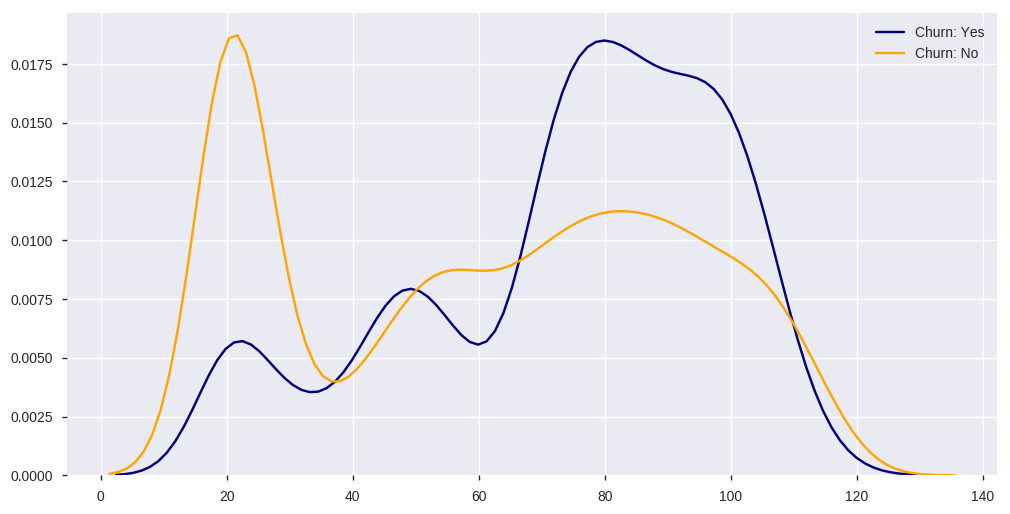

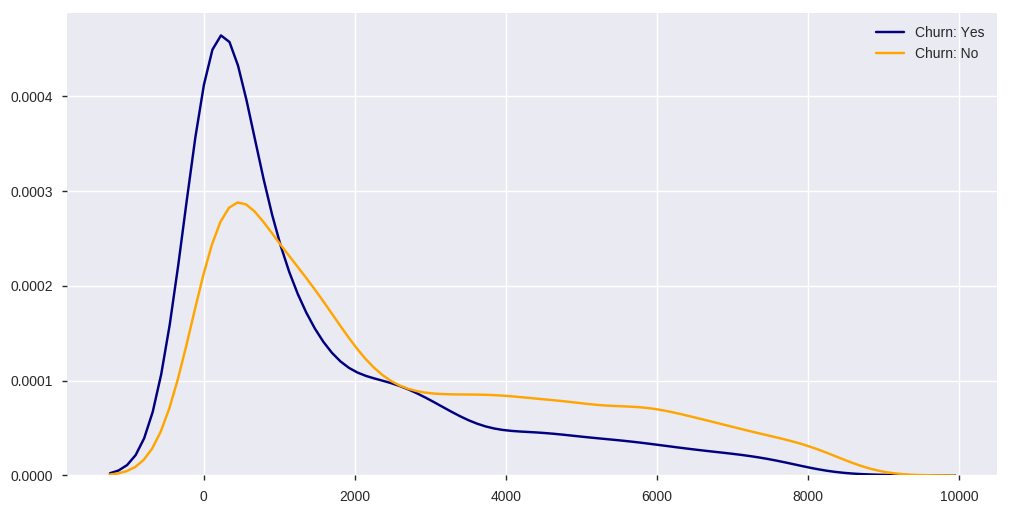

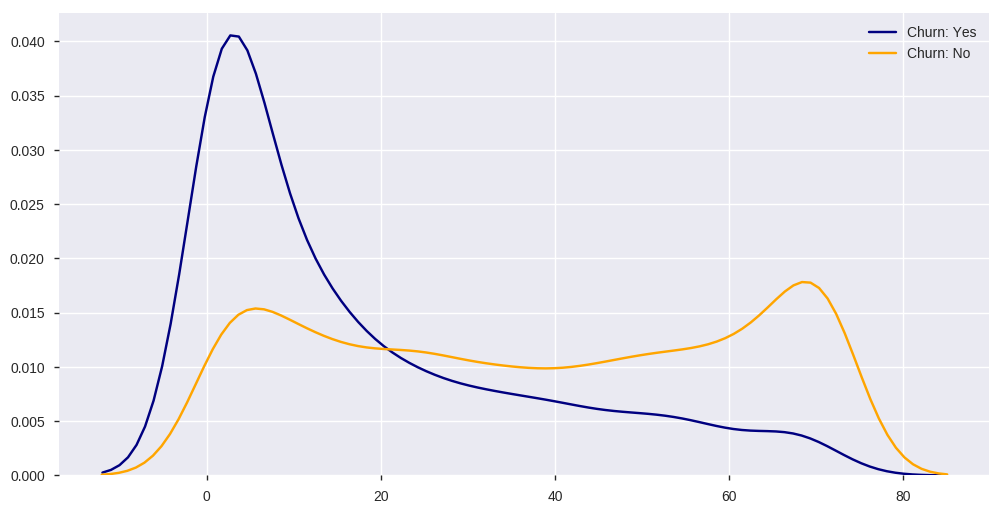

In [16]:
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
kdeplot('tenure')

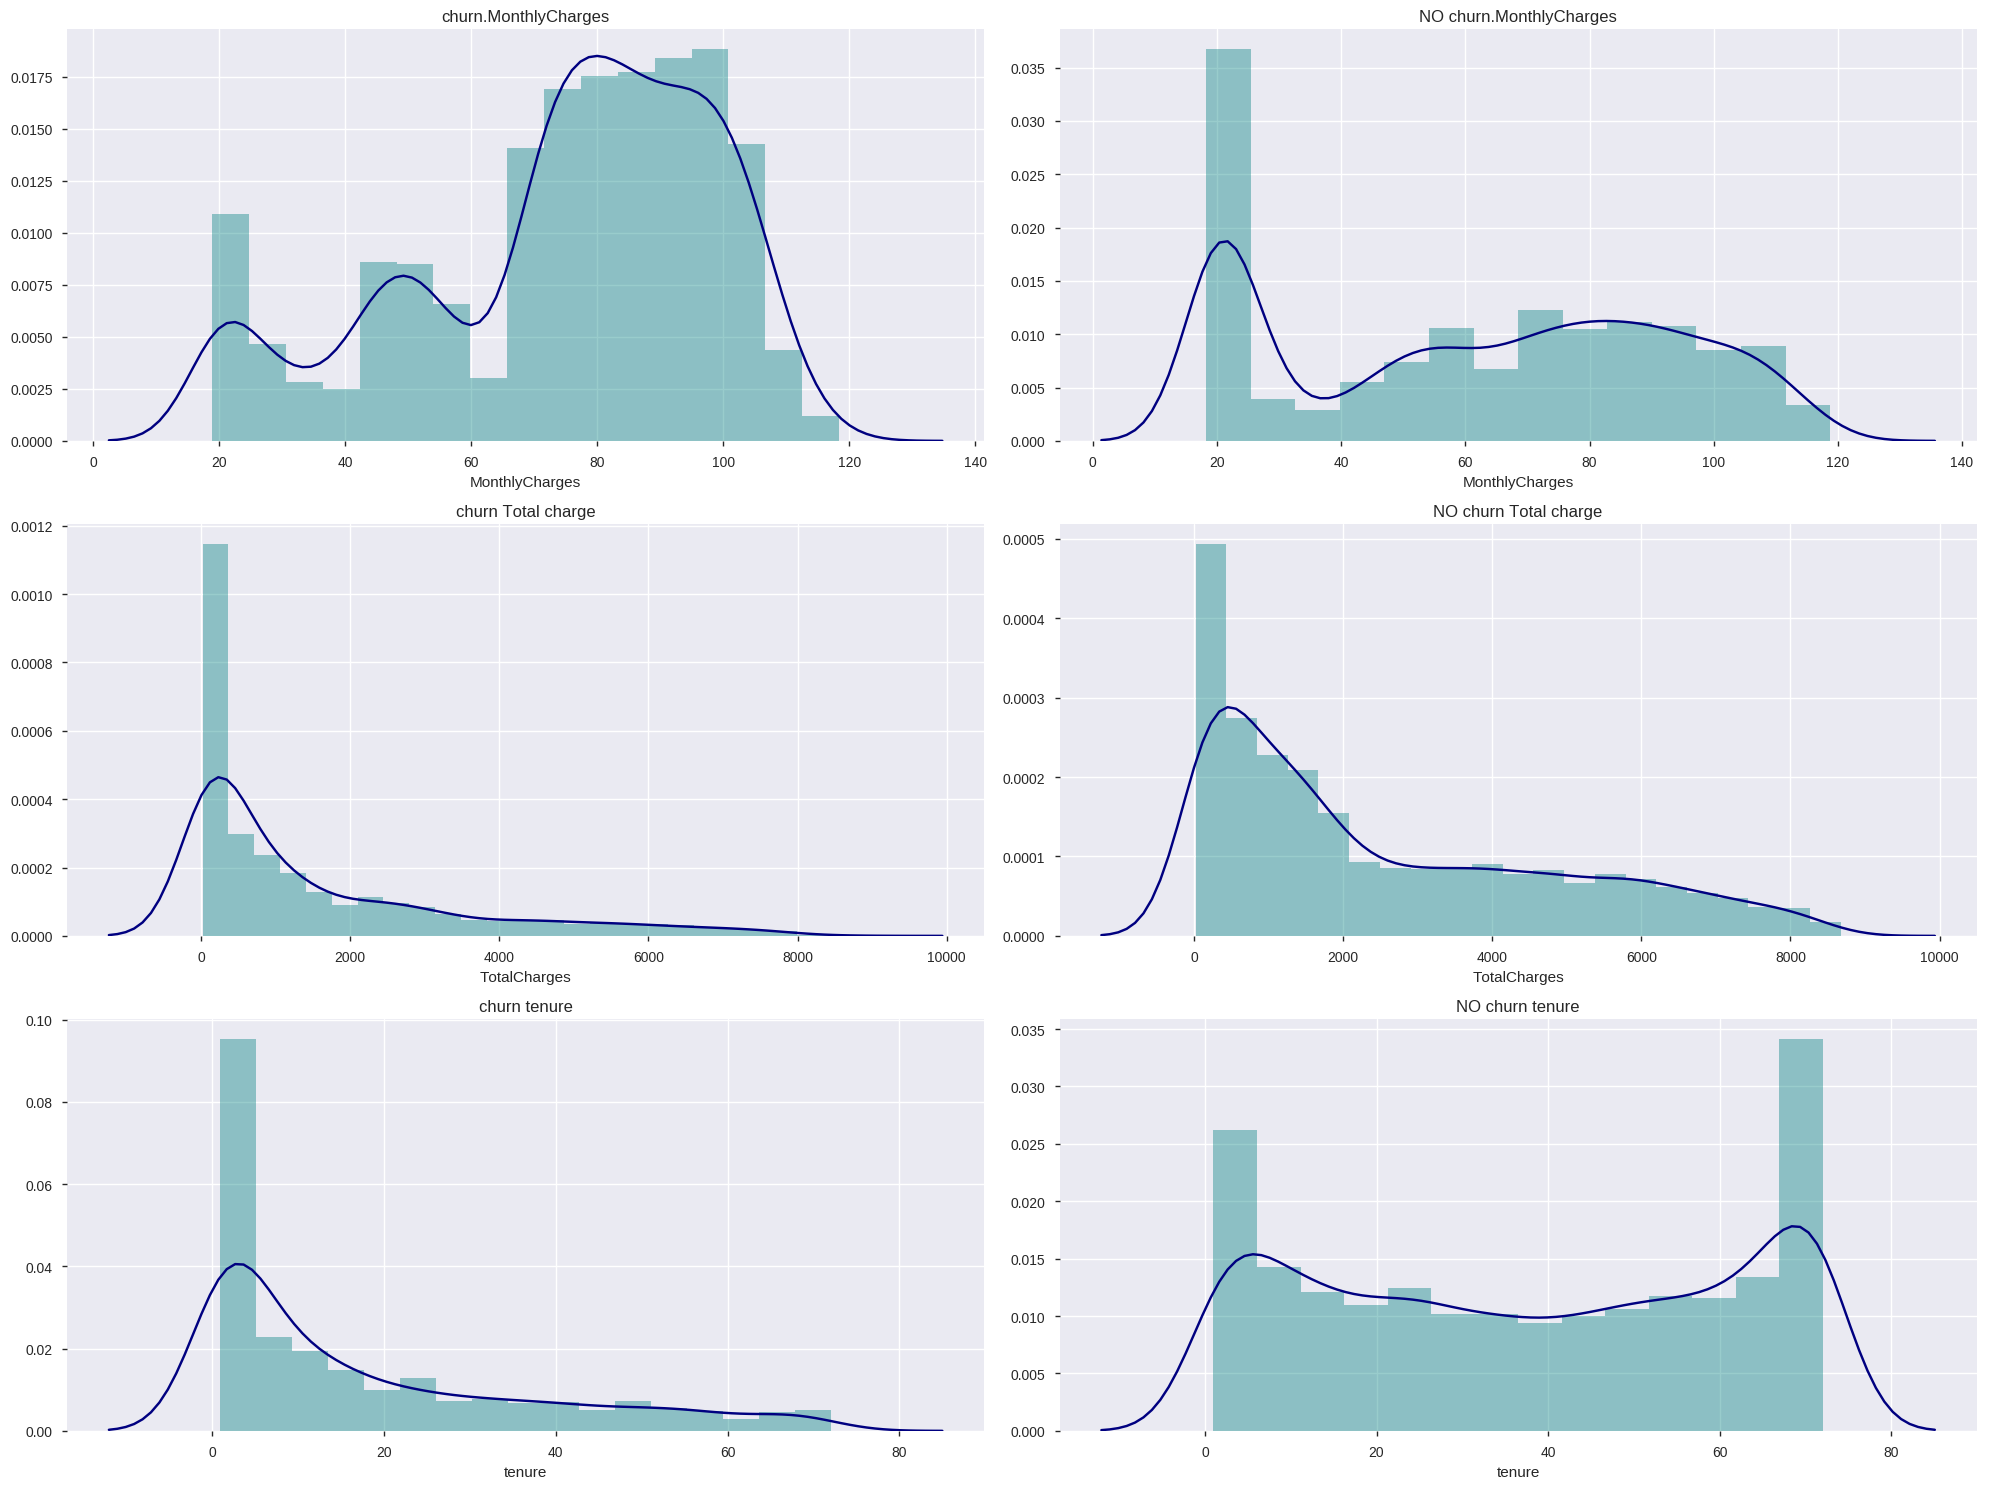

In [17]:
plt.subplots(figsize=(20,15))
plt.subplot(321)
sns.distplot(churn.MonthlyCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn.MonthlyCharges')

plt.subplot(322)
sns.distplot(nochurn.MonthlyCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn.MonthlyCharges')

plt.subplot(323)
sns.distplot(churn.TotalCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn Total charge')

plt.subplot(324)
sns.distplot(nochurn.TotalCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn Total charge')

plt.subplot(325)
sns.distplot(churn.tenure, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn tenure')

plt.subplot(326)
sns.distplot(nochurn.tenure, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn tenure')
plt.tight_layout()

plt.show()

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.8500,29.8500,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,One year,0,Mailed check,56.9500,1889.5000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.8500,108.1500,1
3,7795-CFOCW,1,0,0,0,45,0,-1,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.3000,1840.7500,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.7000,151.6500,1


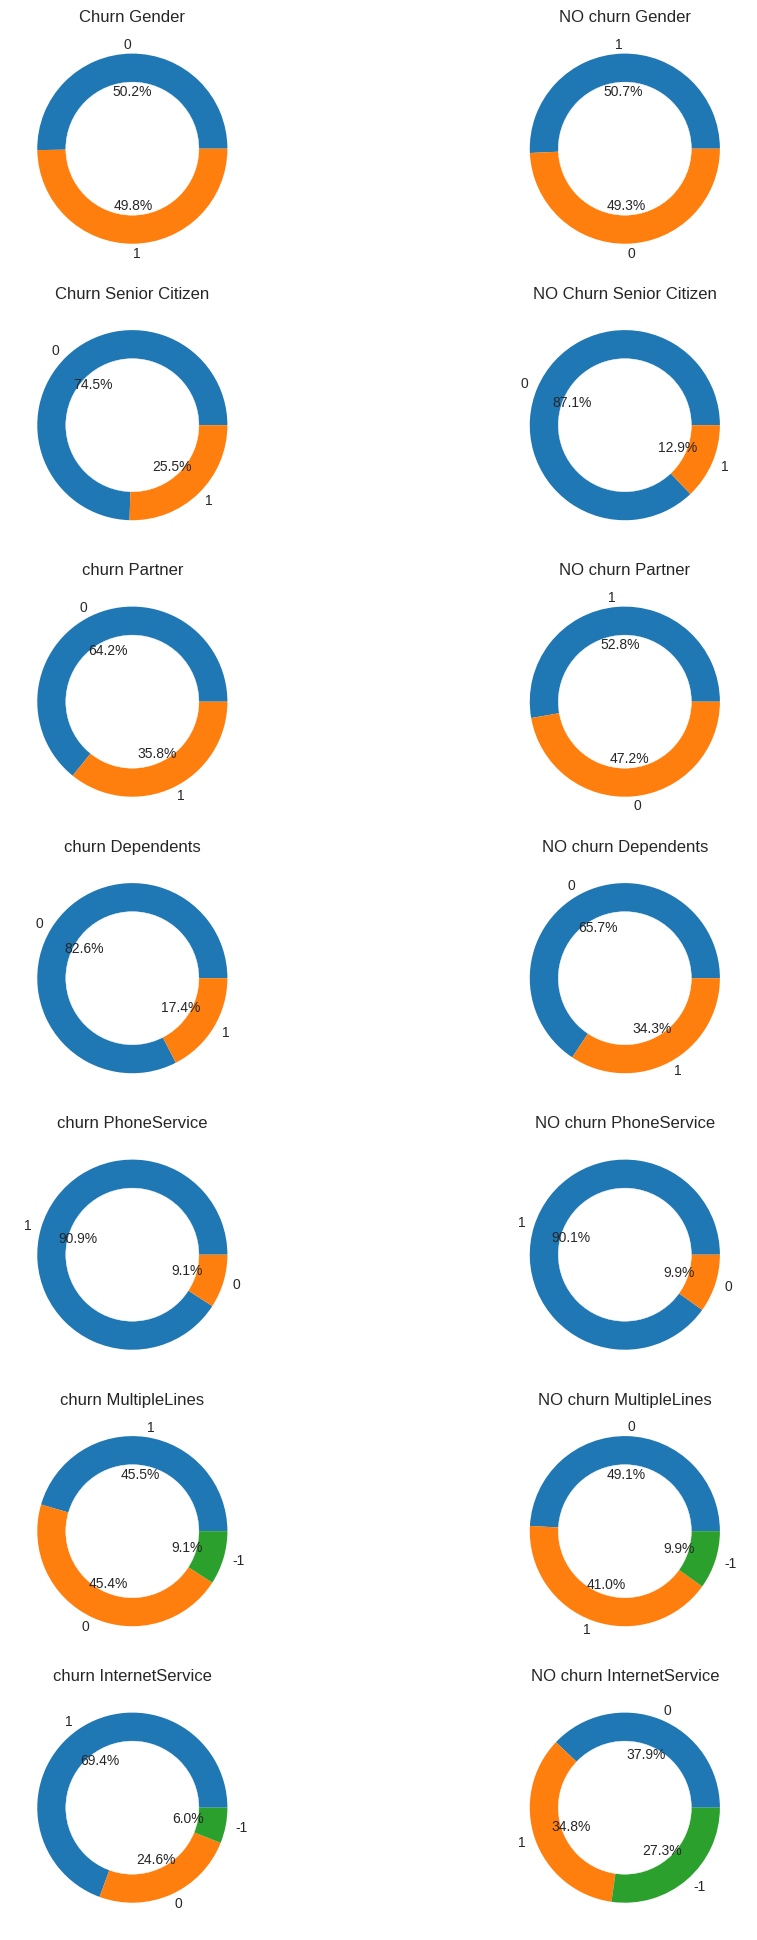

In [19]:
plt.subplots(figsize=(10,25))
plt.subplot(921)
plt.pie(churn.gender.value_counts(), labels=churn.gender.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('Churn Gender')

plt.subplot(922)
plt.pie(nochurn.gender.value_counts(), labels=nochurn.gender.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Gender')
#-----------------------------------------------------------------------------------------#
plt.subplot(923)
plt.pie(churn.SeniorCitizen.value_counts(), labels=churn.SeniorCitizen.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('Churn Senior Citizen')

plt.subplot(924)
plt.pie(nochurn.SeniorCitizen.value_counts(), labels=nochurn.SeniorCitizen.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO Churn Senior Citizen')

plt.subplot(925)
plt.pie(churn.Partner.value_counts(), labels=churn.Partner.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn Partner')

plt.subplot(926)
plt.pie(nochurn.Partner.value_counts(), labels=nochurn.Partner.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Partner')
plt.tight_layout()

plt.subplot(927)
plt.pie(churn.Dependents.value_counts(), labels=churn.Dependents.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn Dependents')

plt.subplot(928)
plt.pie(nochurn.Dependents.value_counts(), labels=nochurn.Dependents.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Dependents')
plt.tight_layout()

plt.subplot(929)
plt.pie(churn.PhoneService.value_counts(), labels=churn.PhoneService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn PhoneService')

plt.subplot(9,2,10)
plt.pie(nochurn.PhoneService.value_counts(), labels=nochurn.PhoneService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn PhoneService')
plt.tight_layout()

plt.subplot(9,2,11)
plt.pie(churn.MultipleLines.value_counts(), labels=churn.MultipleLines.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn MultipleLines')

plt.subplot(9,2,12)
plt.pie(nochurn.MultipleLines.value_counts(), labels=nochurn.MultipleLines.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn MultipleLines')
plt.tight_layout()

plt.subplot(9,2,13)
plt.pie(churn.InternetService.value_counts(), labels=churn.InternetService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn InternetService')

plt.subplot(9,2,14)
plt.pie(nochurn.InternetService.value_counts(), labels=nochurn.InternetService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn InternetService')
plt.tight_layout()

# plt.subplot(325)
# plt.pie(churn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('churn tenure')

# plt.subplot(326)
# plt.pie(nochurn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('NO churn tenure')
# plt.tight_layout()

# plt.subplot(325)
# plt.pie(churn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('churn tenure')

# plt.subplot(326)
# plt.pie(nochurn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('NO churn tenure')
# plt.tight_layout()


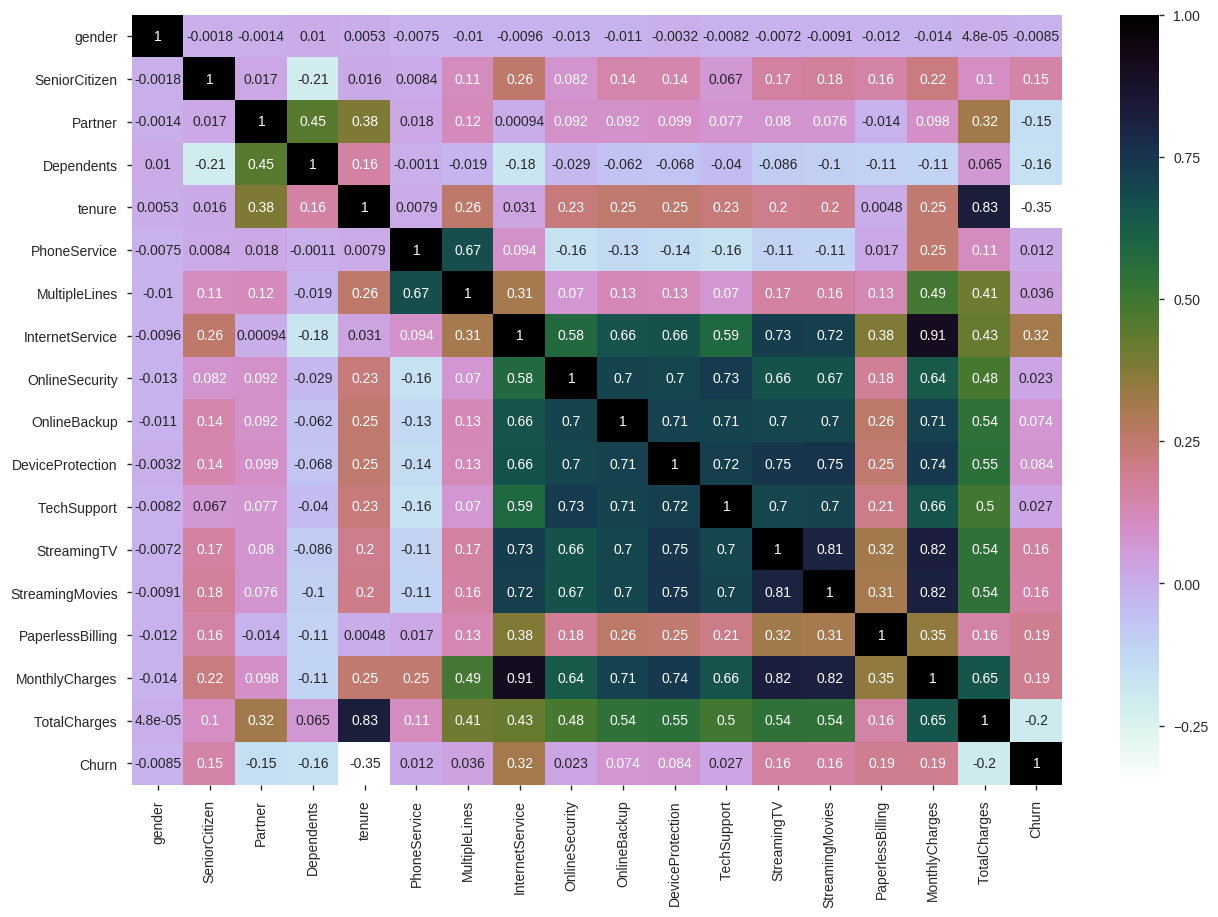

In [20]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

In [21]:
df.groupby('tenure')['Churn'].mean()

tenure
1    0.6199
2    0.5168
3    0.4700
4    0.4716
5    0.4812
6    0.3636
7    0.3893
8    0.3415
9    0.3866
10   0.3879
11   0.3131
12   0.3248
13   0.3486
14   0.3158
15   0.3737
16   0.3500
17   0.2989
18   0.2474
19   0.2603
20   0.2535
21   0.2698
22   0.3000
23   0.1529
24   0.2447
25   0.2911
26   0.1899
27   0.1806
28   0.2105
29   0.2083
30   0.2222
31   0.2462
32   0.2754
33   0.2188
34   0.1846
35   0.1705
36   0.2000
37   0.2308
38   0.2203
39   0.2500
40   0.2031
41   0.2000
42   0.2154
43   0.2308
44   0.1176
45   0.0984
46   0.1622
47   0.2059
48   0.1406
49   0.2273
50   0.1471
51   0.1176
52   0.1000
53   0.2000
54   0.1912
55   0.1406
56   0.1250
57   0.1231
58   0.1642
59   0.1333
60   0.0789
61   0.1053
62   0.0714
63   0.0556
64   0.0500
65   0.1184
66   0.1461
67   0.1020
68   0.0900
69   0.0842
70   0.0924
71   0.0353
72   0.0166
Name: Churn, dtype: float64

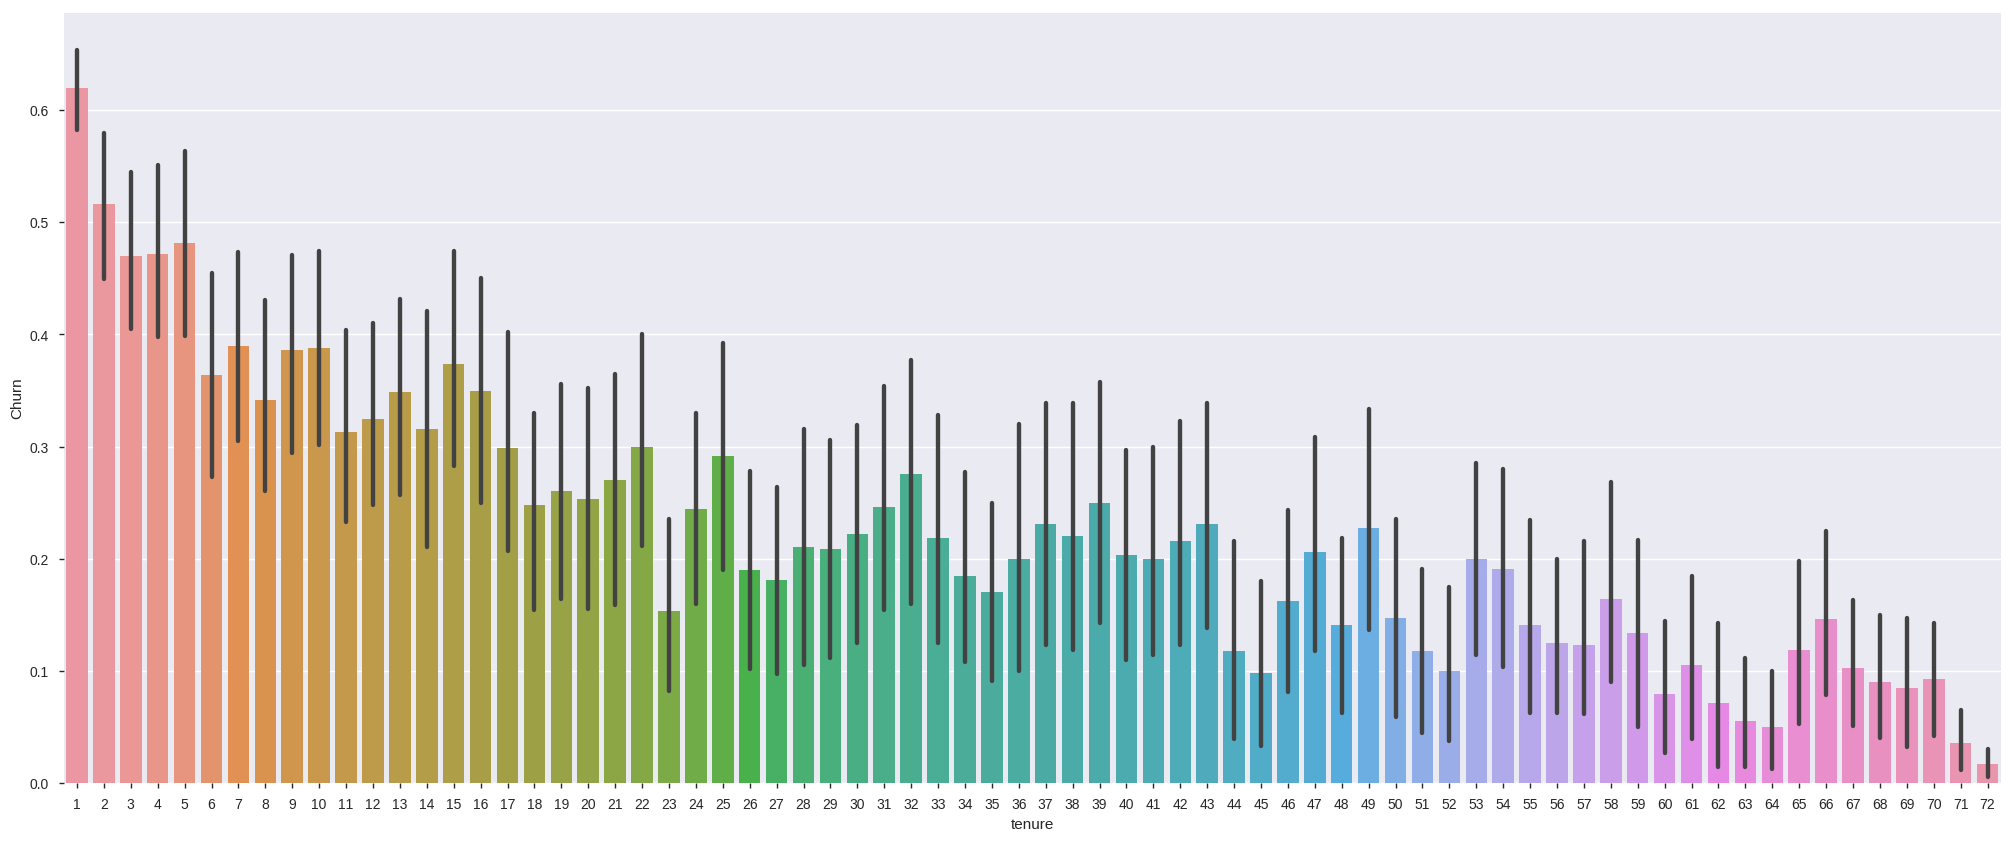

In [22]:
plt.figure(figsize=(25,10))

sns.barplot(df.tenure, df.Churn)

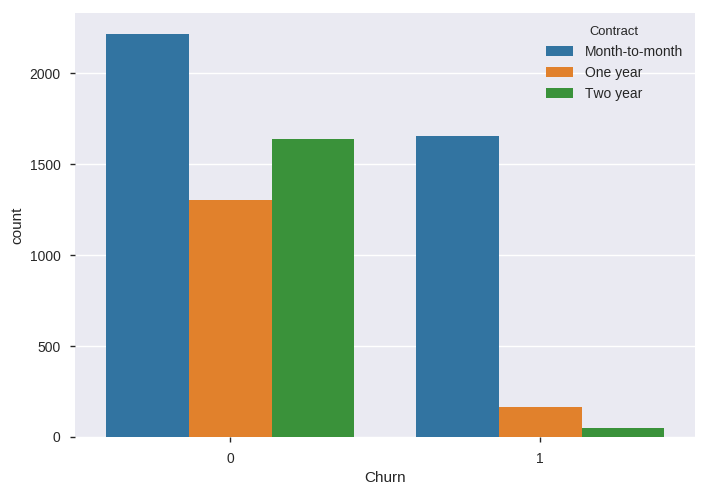

In [23]:
sns.countplot(x="Churn", hue="Contract", data=df)

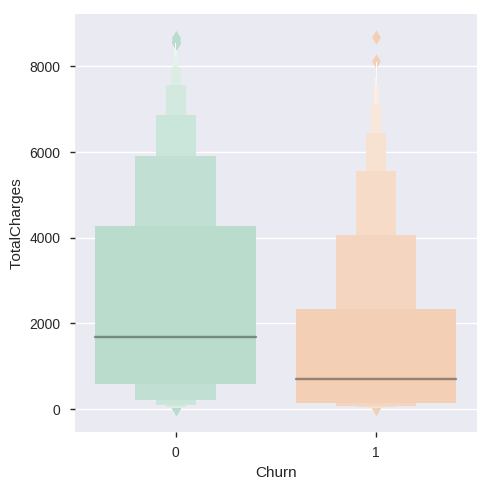

In [24]:
sns.factorplot(y="TotalCharges",x="Churn",data=df,kind="boxen", palette = "Pastel2")

From boxen plot, most of churn customer has less than 2000 in total chrage.
In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

In [25]:
df.drop('customerID', axis=1, inplace=True)

In [26]:
df=pd.concat([pd.get_dummies(df['Contract'], drop_first = True),df],axis=1).drop('Contract',axis=1)
df=pd.concat([pd.get_dummies(df['PaymentMethod'], drop_first = True),df],axis=1).drop('PaymentMethod',axis=1)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

X = df.drop(['Churn'], axis=1)
Y = df.Churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=32, stratify= Y)

feature_cols = X.columns

Accuracy Test  : 0.8090; || Accuracy Train : 0.8728
Precision Test : 0.6863; || Precision Train: 0.8193
Recall Test    : 0.5187; || Recall Train   : 0.6690
Cohen Kappa    : 0.4694; || Avg Precesion  : 0.6360; || AUC:0.7164


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1416  133  1549
1       270  291   561
All    1686  424  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<span style='color:green'>** Feature Importances**</span>

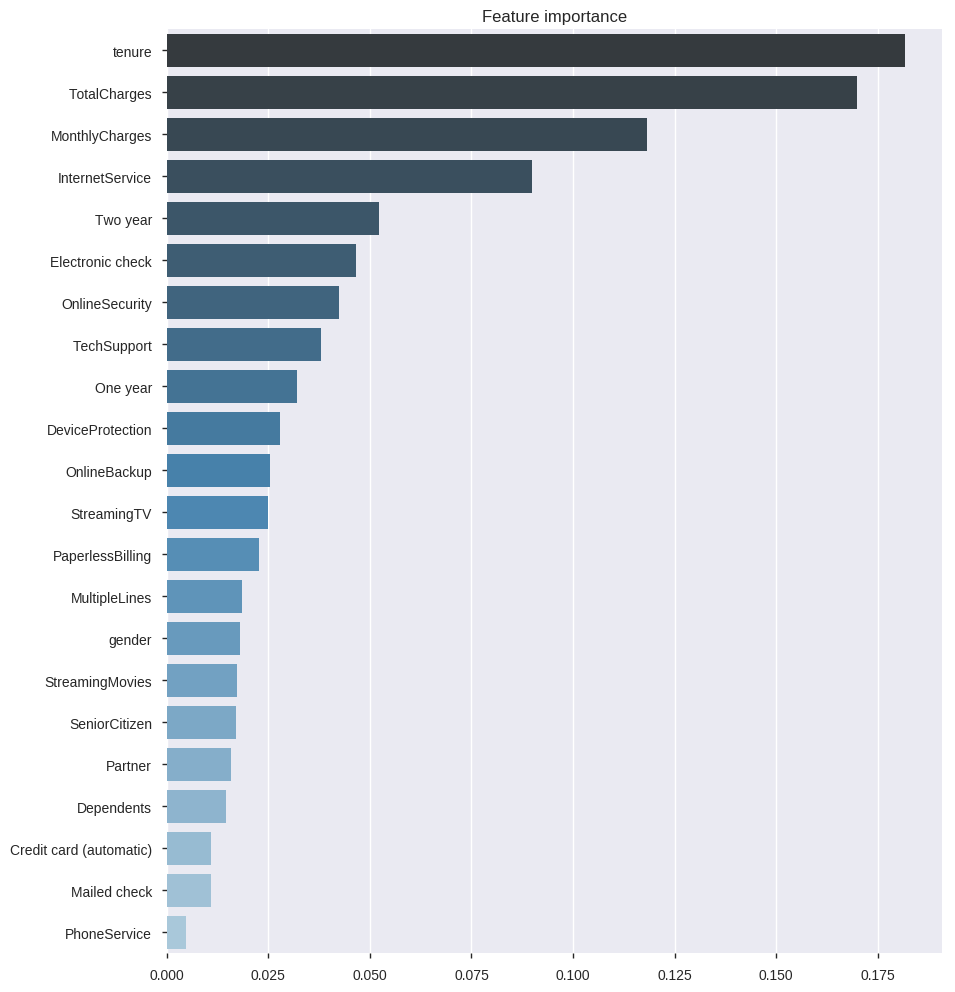

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state=22, max_depth= 10, class_weight={0:1,1:1})
classifier.fit(X_train, y_train)
x_predrf = classifier.predict(X_train)
y_predrf = classifier.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")
print(classification_report(y_test,y_predrf ))
printmd("** Feature Importances**", color="green")

importances = classifier.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=weights.index, x=weights.values, palette="Blues_d", orient='h')

In [29]:
%%time
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, precision_score, recall_score

LR = LogisticRegression('l2')
LR.fit(X_train, y_train)

x_predrf = LR.predict(X_train)
y_predrf = LR.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8123; || Accuracy Train : 0.8046
Precision Test : 0.6782; || Precision Train: 0.6614
Recall Test    : 0.5597; || Recall Train   : 0.5420
Cohen Kappa    : 0.4909; || Avg Precesion  : 0.4802; || AUC:0.7318


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1400  149  1549
1       247  314   561
All    1647  463  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110

CPU times: user 164 ms, sys: 88 ms, total: 252 ms
Wall time: 165 ms


In [30]:
%%time

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

x_predrf = xgb.predict(X_train)
y_predrf = xgb.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8128; || Accuracy Train : 0.8220
Precision Test : 0.6921; || Precision Train: 0.7130
Recall Test    : 0.5330; || Recall Train   : 0.5528
Cohen Kappa    : 0.4825; || Avg Precesion  : 0.5130; || AUC:0.7236


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1416  133  1549
1       262  299   561
All    1678  432  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

CPU times: user 616 ms, sys: 168 ms, total: 784 ms
Wall time: 990 ms


In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from catboost import CatBoostClassifier


In [32]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
x_predrf = eclf1.predict(X_train)
y_predrf = eclf1.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8128; || Accuracy Train : 0.8377
Precision Test : 0.6939; || Precision Train: 0.7440
Recall Test    : 0.5294; || Recall Train   : 0.5933
Cohen Kappa    : 0.4812; || Avg Precesion  : 0.5495; || AUC:0.7224


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1418  131  1549
1       264  297   561
All    1682  428  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

